# Payment Date Prediction 


### Importing related Libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder

### Store the dataset into the Dataframe


In [2]:
df = pd.read_csv("dataset.csv")

### Check the shape of the dataframe


In [3]:
df.shape

(50000, 19)

### Check the Detail information of the dataframe

In [4]:
df.info

<bound method DataFrame.info of       business_code cust_number       name_customer           clear_date  \
0              U001  0200769623        WAL-MAR corp  2020-02-11 00:00:00   
1              U001  0200980828              BEN E   2019-08-08 00:00:00   
2              U001  0200792734          MDV/ trust  2019-12-30 00:00:00   
3              CA02  0140105686            SYSC llc                  NaN   
4              U001  0200769623  WAL-MAR foundation  2019-11-25 00:00:00   
...             ...         ...                 ...                  ...   
49995          U001  0200561861      CO corporation                  NaN   
49996          U001  0200769623          WAL-MAR co  2019-09-03 00:00:00   
49997          U001  0200772595    SAFEW associates  2020-03-05 00:00:00   
49998          U001  0200726979           BJ'S  llc  2019-12-12 00:00:00   
49999          U001  0200020431            DEC corp  2019-01-15 00:00:00   

       buisness_year        doc_id posting_date  docume

### Display All the column names

In [5]:
list(df.columns)

['business_code',
 'cust_number',
 'name_customer',
 'clear_date',
 'buisness_year',
 'doc_id',
 'posting_date',
 'document_create_date',
 'document_create_date.1',
 'due_in_date',
 'invoice_currency',
 'document type',
 'posting_id',
 'area_business',
 'total_open_amount',
 'baseline_create_date',
 'cust_payment_terms',
 'invoice_id',
 'isOpen']

### Describe the entire dataset

In [6]:
df.describe()

,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,posting_id,area_business,total_open_amount,baseline_create_date,invoice_id,isOpen
count,50000.000000,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,50000.0,0.0,50000.000000,5.000000e+04,4.999400e+04,50000.000000
mean,2019.305700,2.012238e+09,2.019351e+07,2.019354e+07,2.019368e+07,1.0,NaN,32337.021651,2.019354e+07,2.011340e+09,0.200000
std,0.460708,2.885235e+08,4.496041e+03,4.482134e+03,4.470614e+03,0.0,NaN,39205.975231,4.482701e+03,2.766335e+08,0.400004
min,2019.000000,1.928502e+09,2.018123e+07,2.018123e+07,2.018122e+07,1.0,NaN,0.720000,2.018121e+07,1.928502e+09,0.000000
25%,2019.000000,1.929342e+09,2.019050e+07,2.019051e+07,2.019052e+07,1.0,NaN,4928.312500,2.019050e+07,1.929342e+09,0.000000
50%,2019.000000,1.929964e+09,2.019091e+07,2.019091e+07,2.019093e+07,1.0,NaN,17609.010000,2.019091e+07,1.929964e+09,0.000000
75%,2020.000000,1.930619e+09,2.020013e+07,2.020013e+07,2.020022e+07,1.0,NaN,47133.635000,2.020013e+07,1.930619e+09,0.000000
max,2020.000000,9.500000e+09,2.020052e+07,2.020052e+07,2.020071e+07,1.0,NaN,668593.360000,2.020052e+07,2.960636e+09,1.000000


In [7]:
### Showing the columns of the dataset
freqCount= df.nunique().to_frame(name='Counts')
freqCount

,Counts
business_code,6
cust_number,1425
name_customer,4197
clear_date,403
buisness_year,2
doc_id,48839
posting_date,506
document_create_date,507
document_create_date.1,506
due_in_date,547


# Data Cleaning

- Show top 5 records from the dataset

In [8]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR corp,2020-02-11 00:00:00,2020.0,1.930438e+09,2020-01-26,20200125,20200126,20200210.0,USD,RV,1.0,NaN,54273.28,20200126.0,NAH4,1.930438e+09,0
1,U001,0200980828,BEN E,2019-08-08 00:00:00,2019.0,1.929646e+09,2019-07-22,20190722,20190722,20190811.0,USD,RV,1.0,NaN,79656.60,20190722.0,NAD1,1.929646e+09,0
2,U001,0200792734,MDV/ trust,2019-12-30 00:00:00,2019.0,1.929874e+09,2019-09-14,20190914,20190914,20190929.0,USD,RV,1.0,NaN,2253.86,20190914.0,NAA8,1.929874e+09,0
3,CA02,0140105686,SYSC llc,NaN,2020.0,2.960623e+09,2020-03-30,20200330,20200330,20200410.0,CAD,RV,1.0,NaN,3299.70,20200331.0,CA10,2.960623e+09,1
4,U001,0200769623,WAL-MAR foundation,2019-11-25 00:00:00,2019.0,1.930148e+09,2019-11-13,20191113,20191113,20191128.0,USD,RV,1.0,NaN,33133.29,20191113.0,NAH4,1.930148e+09,0


### Display the Null values percentage against every columns (compare to the total number of records)

- Output expected : area_business - 100% null, clear_data = 20% null, invoice_id = 0.12% null

In [9]:
### Percentage of missing values - all the columns
nanValues = df.isnull().sum().to_frame(name='Counts')
nanValues = (nanValues.div(df.shape[0], axis=0))*100
nanValues

,Counts
business_code,0.000
cust_number,0.000
name_customer,0.000
clear_date,20.000
buisness_year,0.000
doc_id,0.000
posting_date,0.000
document_create_date,0.000
document_create_date.1,0.000
due_in_date,0.000


In [10]:
### Percentage of missing values - only the columns with missing values
nanValues = df.isnull().sum().to_frame(name='Counts')
nanValues = nanValues[nanValues['Counts']>0]
nanFeatures = nanValues.index.values
nanValues = (nanValues.div(df.shape[0], axis=0))*100
nanValues
print("Hence we got, 'area_business' - 100% null, 'clear_data' = 20% null, 'invoice_id' = 0.12% null")

Hence we got, 'area_business' - 100% null, 'clear_data' = 20% null, 'invoice_id' = 0.12% null


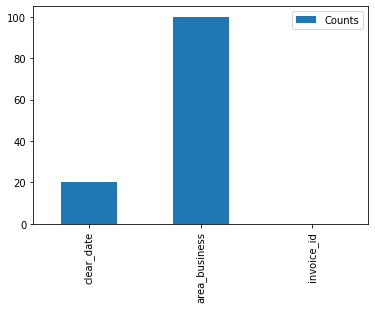

In [11]:
### Plotting in a bar chart
nanValues.plot(kind='bar')
plt.show()

### Display Invoice_id and Doc_Id

- Note - Many of the would have same invoice_id and doc_id


In [12]:
(df['doc_id'] == df['invoice_id']).count()

50000

#### Write a code to check - 'baseline_create_date',"document_create_date",'document_create_date.1' - these columns are almost same.

- Please note, if they are same, we need to drop them later



In [13]:
### Write a code to check - 'baseline_create_date',"document_create_date",'document_create_date.1' - these columns are almost same.
checkDF = df[['baseline_create_date','document_create_date','document_create_date.1']]
correlationDF = checkDF.corr()
correlationDF


,baseline_create_date,document_create_date,document_create_date.1
baseline_create_date,1.000000,0.994078,0.999527
document_create_date,0.994078,1.000000,0.994547
document_create_date.1,0.999527,0.994547,1.000000


#### Please check, Column 'posting_id' is constant columns or not


In [14]:
### check 'posting_id' is constant or not
if (df['posting_id'].nunique() == 1):
    print("posting_id is constant")

posting_id is constant


#### Please check 'isOpen' is a constant column and relevant column for this project or not

In [15]:
if (df['isOpen'].nunique() == 1):
    print("isOpen is constant")
else:
    print("isOpen is not constant")

isOpen is not constant


### Write the code to drop all the following columns from the dataframe

- 'area_business'
- "posting_id"
- "invoice_id"
- "document_create_date"
- "isOpen"
- 'document type' 
- 'document_create_date.1

In [16]:

### Dropping the columns
df.drop(['area_business','posting_id','invoice_id','document_create_date','isOpen','document type','document_create_date.1'],axis=1,inplace=True)
list(df.columns)

['business_code',
 'cust_number',
 'name_customer',
 'clear_date',
 'buisness_year',
 'doc_id',
 'posting_date',
 'due_in_date',
 'invoice_currency',
 'total_open_amount',
 'baseline_create_date',
 'cust_payment_terms']

### Please check from the dataframe whether all the columns are removed or not 

In [17]:
df.shape

(50000, 12)

In the above step we have removed 7 columns from the dataframe and hence the total number of columns in the dataframe is 12.

In [18]:
df.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'due_in_date',
       'invoice_currency', 'total_open_amount', 'baseline_create_date',
       'cust_payment_terms'],
      dtype='object')

All the columns are removed from the dataframe.

### Show all the Dublicate rows from the dataframe

In [19]:
### Show all the name of duplicate rows
dupDF = df[df.duplicated()]
dupDF

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
1041,U001,0200769623,WAL-MAR in,2019-03-12 00:00:00,2019.0,1.928870e+09,2019-02-28,20190315.0,USD,19557.41,20190228.0,NAH4
2400,U001,0200769623,WAL-MAR trust,2019-08-28 00:00:00,2019.0,1.929758e+09,2019-08-18,20190902.0,USD,5600.41,20190818.0,NAH4
2584,U001,0200769623,WAL-MAR corporation,2019-12-16 00:00:00,2019.0,1.930217e+09,2019-12-04,20191219.0,USD,35352.17,20191204.0,NAH4
3755,U001,0200769623,WAL-MAR,2019-11-22 00:00:00,2019.0,1.930137e+09,2019-11-12,20191127.0,USD,2982.64,20191112.0,NAH4
3873,CA02,0140104409,LOB associates,NaN,2020.0,2.960629e+09,2020-04-14,20200425.0,CAD,82975.82,20200415.0,CA10
...,...,...,...,...,...,...,...,...,...,...,...,...
49928,U001,0200915438,GROC trust,2019-08-15 00:00:00,2019.0,1.929646e+09,2019-07-25,20190809.0,USD,6969.00,20190725.0,NAA8
49963,U001,0200759878,SA us,2019-01-29 00:00:00,2019.0,1.928614e+09,2019-01-13,20190128.0,USD,10968.24,20190113.0,NAH4
49986,U001,0200772670,ASSOCIAT foundation,2019-06-12 00:00:00,2019.0,1.929403e+09,2019-05-29,20190613.0,USD,155837.53,20190529.0,NAU5
49990,U001,0200765011,MAINES llc,2019-06-06 00:00:00,2019.0,1.929365e+09,2019-05-22,20190606.0,USD,4008.05,20190522.0,NAA8


### Display the Number of Dublicate Rows

In [20]:
### Checking the duplicates in the dataset
df.duplicated().sum()

1161

### Drop all the Dublicate Rows

In [21]:
### Dropping the duplicates
df.drop_duplicates(inplace=True)

#### Now check for all dublicate rows now

- Note - It must be 0 by now

In [22]:
### Checking the number of duplicates === It must be 0
df.duplicated().sum()

0

### Check for the number of Rows and Columns in your dataset

In [23]:
df.shape

(48839, 12)

We have now **48839** rows and **12** columns in our dataset.

### Find out the total count of null values in each columns

In [24]:
### Finding the total number of null values in each column
df.isnull().sum().to_frame(name='NULL Counts')

,NULL Counts
business_code,0
cust_number,0
name_customer,0
clear_date,9681
buisness_year,0
doc_id,0
posting_date,0
due_in_date,0
invoice_currency,0
total_open_amount,0


# Data Type Conversion 

### Please check the data type of each column of the dataframe

In [25]:
### Check the data type of each column
df.dtypes

business_code            object
cust_number              object
name_customer            object
clear_date               object
buisness_year           float64
doc_id                  float64
posting_date             object
due_in_date             float64
invoice_currency         object
total_open_amount       float64
baseline_create_date    float64
cust_payment_terms       object
dtype: object

### Check the datatype format of below columns

- clear_date  
- posting_date
- due_in_date 
- baseline_create_date

In [26]:
df[['clear_date','posting_date','due_in_date','baseline_create_date']].dtypes

clear_date               object
posting_date             object
due_in_date             float64
baseline_create_date    float64
dtype: object

### converting date columns into date time formats

- clear_date  
- posting_date
- due_in_date 
- baseline_create_date


- **Note - You have to convert all these above columns into "%Y%m%d" format**

In [27]:
### Converting the data type to datetime
df['clear_date'] = pd.to_datetime(df['clear_date'])
df['posting_date'] = pd.to_datetime(df['posting_date'])
df['due_in_date'] = pd.to_datetime(df['due_in_date'], format='%Y%m%d')
df['baseline_create_date'] = pd.to_datetime(df['baseline_create_date'], format='%Y%m%d')
df[[ 'clear_date','posting_date','due_in_date','baseline_create_date']]

,clear_date,posting_date,due_in_date,baseline_create_date
0,2020-02-11,2020-01-26,2020-02-10,2020-01-26
1,2019-08-08,2019-07-22,2019-08-11,2019-07-22
2,2019-12-30,2019-09-14,2019-09-29,2019-09-14
3,NaT,2020-03-30,2020-04-10,2020-03-31
4,2019-11-25,2019-11-13,2019-11-28,2019-11-13
...,...,...,...,...
49995,NaT,2020-04-21,2020-05-06,2020-04-21
49996,2019-09-03,2019-08-15,2019-08-30,2019-08-15
49997,2020-03-05,2020-02-19,2020-03-05,2020-02-19
49998,2019-12-12,2019-11-27,2019-12-12,2019-11-27


### Please check the datatype of all the columns after conversion of the above 4 columns

In [28]:
df[[ 'clear_date','posting_date','due_in_date','baseline_create_date']].dtypes

clear_date              datetime64[ns]
posting_date            datetime64[ns]
due_in_date             datetime64[ns]
baseline_create_date    datetime64[ns]
dtype: object

#### the invoice_currency column contains two different categories, USD and CAD

- Please do a count of each currency 

In [29]:
### Count each currency type
df['invoice_currency'].value_counts()

USD    45011
CAD     3828
Name: invoice_currency, dtype: int64

#### display the "total_open_amount" column value

In [30]:
### Displaying the 'total_open_amount' column values
df['total_open_amount'].count()

48839

### Convert all CAD into USD currency of "total_open_amount" column

- 1 CAD = 0.7 USD
- Create a new column i.e "converted_usd" and store USD and convered CAD to USD

In [31]:
### Converting CAD into USD currency
def convertUSD(x):
    if x['invoice_currency'] == 'CAD':
        return np.round(x['total_open_amount']*0.78, decimals=2)
    else:
        return x['total_open_amount']

In [32]:
### Storing the USD values in a new column named 'converted_usd'
df['converted_usd'] = df.apply(convertUSD, axis=1)

### Display the new "converted_usd" column values

In [33]:
### Displaying the 'converted_usd' column values
df[['converted_usd']]

,converted_usd
0,54273.28
1,79656.60
2,2253.86
3,2573.77
4,33133.29
...,...
49995,3187.86
49996,6766.54
49997,6120.86
49998,63.48


### Display year wise total number of record 

- Note -  use "buisness_year" column for this 

In [34]:
### Display year wise total number of records
df.groupby(df['buisness_year']).count()

,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,converted_usd
buisness_year,,,,,,,,,,,,
2019.0,33975,33975,33975,33975,33975,33975,33975,33975,33975,33975,33975,33975
2020.0,14864,14864,14864,5183,14864,14864,14864,14864,14864,14864,14864,14864


### Write the code to delete the following columns 

- 'invoice_currency'
- 'total_open_amount', 

In [35]:
df.drop(columns=['invoice_currency','total_open_amount'],inplace=True)
df.shape

(48839, 11)

### Write a code to check the number of columns in dataframe

In [36]:
df.columns.values

array(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'due_in_date',
       'baseline_create_date', 'cust_payment_terms', 'converted_usd'],
      dtype=object)

In [37]:
print("The number of columns in the dataframe is: ",len(df.columns))

The number of columns in the dataframe is:  11


# Splitting the Dataset 

### Look for all columns containing null value

- Note - Output expected is only one column 

In [38]:
### Looking for all columns containing null values
df.isnull().sum().to_frame(name='Counts')

,Counts
business_code,0
cust_number,0
name_customer,0
clear_date,9681
buisness_year,0
doc_id,0
posting_date,0
due_in_date,0
baseline_create_date,0
cust_payment_terms,0


From the above output, we can see that there is only one i.e ```clear_date``` column which contains null values.

#### Find out the number of null values from the column that you got from the above code

In [39]:
### Number of columns with null values
df[['clear_date']].isnull().sum().to_frame(name='Counts')

,Counts
clear_date,9681


So we have **9681** null values in the ```clear_date``` column.

### On basis of the above column we are spliting data into dataset

- First dataframe (refer that as maindata) only containing the rows, that have NULL data in that column ( This is going to be our train dataset ) 
- Second dataframe (refer that as nulldata) that contains the columns, that have Not Null data in that column ( This is going to be our test dataset ) 

In [40]:
### Splitting the data into training and testing data
testDF = df[df['clear_date'].isnull()==True]
df = df.dropna()

### Check the number of Rows and Columns for both the dataframes 

In [41]:
### Number of rows and columns in the training data
df.shape

(39158, 11)

In [42]:
### Number of rows and columns in the testing data
testDF.shape

(9681, 11)

### Display the 5 records from maindata and nulldata dataframes

In [43]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.28
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.60
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.86
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.29
5,CA02,0140106181,THE corporation,2019-12-04,2019.0,2.960581e+09,2019-09-20,2019-10-04,2019-09-24,CA10,17336.16


In [44]:
testDF.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
3,CA02,0140105686,SYSC llc,NaT,2020.0,2.960623e+09,2020-03-30,2020-04-10,2020-03-31,CA10,2573.77
7,U001,0200744019,TARG us,NaT,2020.0,1.930659e+09,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.02
10,U001,0200418007,AM,NaT,2020.0,1.930611e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,3525.59
14,U001,0200739534,OK systems,NaT,2020.0,1.930788e+09,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.65
15,U001,0200353024,DECA corporation,NaT,2020.0,1.930817e+09,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.06


## Considering the **maindata**

#### Generate a new column "Delay" from the existing columns

- Note - You are expected to create a new column 'Delay' from two existing columns, "clear_date" and "due_in_date" 
- Formula - Delay = clear_date - due_in_date

In [45]:
df['Delay'] = (df['clear_date'] - df['due_in_date']).dt.days
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,Delay
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.28,1
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.60,-3
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.86,92
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.29,-3
5,CA02,0140106181,THE corporation,2019-12-04,2019.0,2.960581e+09,2019-09-20,2019-10-04,2019-09-24,CA10,17336.16,61


### Generate a new column "avgdelay" from the existing columns

- Note - You are expected to make a new column "avgdelay" by grouping "name_customer" column with reapect to mean of the "Delay" column.
- This new column "avg_delay" is meant to store "customer_name" wise delay
- groupby('name_customer')['Delay'].mean(numeric_only=False)
- Display the new "avg_delay" column

In [46]:
### Generating a new column 'avgdelay' from the existing 'Delay' column
df['avg_delay'] = df.groupby('name_customer')['Delay'].mean(numeric_only=False)
df[['avg_delay']]

,avg_delay
0,NaN
1,NaN
2,NaN
4,NaN
5,NaN
...,...
49994,NaN
49996,NaN
49997,NaN
49998,NaN


You need to add the "avg_delay" column with the maindata, mapped with "name_customer" column

 - Note - You need to use map function to map the avgdelay with respect to "name_customer" column

In [47]:
### Mapping the 'avg_delay' column values with 'name_customer' column values
df['avg_delay'] = df['name_customer'].map(df.groupby('name_customer')['Delay'].mean(numeric_only=False))
df[['avg_delay']]

,avg_delay
0,-2.702202
1,19.000000
2,8.090909
4,-2.185096
5,71.444444
...,...
49994,-0.385417
49996,-2.472123
49997,1.047619
49998,1.567164


### Observe that the "avg_delay" column is in days format. You need to change the format into seconds

- Days_format :  17 days 00:00:00
- Format in seconds : 1641600.0

In [48]:
### Format the 'avg_delay' column values from days to seconds
df['avg_delay'] = df['avg_delay']*86400
df[['avg_delay']]

,avg_delay
0,-2.334702e+05
1,1.641600e+06
2,6.990545e+05
4,-1.887923e+05
5,6.172800e+06
...,...
49994,-3.330000e+04
49996,-2.135915e+05
49997,9.051429e+04
49998,1.354030e+05


### Display the maindata dataframe 

In [49]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,Delay,avg_delay
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.28,1,-2.334702e+05
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.60,-3,1.641600e+06
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.86,92,6.990545e+05
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.29,-3,-1.887923e+05
5,CA02,0140106181,THE corporation,2019-12-04,2019.0,2.960581e+09,2019-09-20,2019-10-04,2019-09-24,CA10,17336.16,61,6.172800e+06


### Since you have created the "avg_delay" column from "Delay" and "clear_date" column, there is no need of these two columns anymore 

- You are expected to drop "Delay" and "clear_date" columns from maindata dataframe 

In [50]:
### Drop the 'Delay' and 'clear_date' columns
df.drop(columns=['Delay','clear_date'],inplace=True)
df.head()

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,avg_delay
0,U001,0200769623,WAL-MAR corp,2020.0,1.930438e+09,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.28,-2.334702e+05
1,U001,0200980828,BEN E,2019.0,1.929646e+09,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.60,1.641600e+06
2,U001,0200792734,MDV/ trust,2019.0,1.929874e+09,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.86,6.990545e+05
4,U001,0200769623,WAL-MAR foundation,2019.0,1.930148e+09,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.29,-1.887923e+05
5,CA02,0140106181,THE corporation,2019.0,2.960581e+09,2019-09-20,2019-10-04,2019-09-24,CA10,17336.16,6.172800e+06


# Splitting of Train and the Test Data

### You need to split the "maindata" columns into X and y dataframe

- Note - y should have the target column i.e. "avg_delay" and the other column should be in X

- X is going to hold the source fields and y will be going to hold the target fields

In [51]:
### Splitting the data into training and testing data
#### y is taken as the 'avg_delay' column and x is taken as the remaining columns
X, y = df[set(df.columns) - set(['avg_delay'])], df['avg_delay']


#### You are expected to split both the dataframes into train and test format in 60:40 ratio 

- Note - The expected output should be in "X_train", "X_loc_test", "y_train", "y_loc_test" format 

In [52]:
### Splitting the df into training and testing data in 60:40 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

### Please check for the number of rows and columns of all the new dataframes (all 4)

In [53]:
### Checking the number of rows and columns of all the new dataframes
print("Rows and Columns of X_train: ",X_train.shape)
print("Rows and Columns of X_test: ",X_test.shape)
print("Rows and Columns of y_train: ",y_train.shape)
print("Rows and Columns of y_test: ",y_test.shape)

Rows and Columns of X_train:  (23494, 10)
Rows and Columns of X_test:  (15664, 10)
Rows and Columns of y_train:  (23494,)
Rows and Columns of y_test:  (15664,)


### Now you are expected to split the "X_loc_test" and "y_loc_test" dataset into "Test" and "Validation" (as the names given below) dataframe with 50:50 format 

- Note - The expected output should be in "X_val", "X_test", "y_val", "y_test" format

In [54]:
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5)

### Please check for the number of rows and columns of all the 4 dataframes 

In [55]:
### Checking the number of rows and columns of all the new dataframes
print("Rows and Columns of X_val: ",X_val.shape)
print("Rows and Columns of X_test: ",X_test.shape)
print("Rows and Columns of y_val: ",y_val.shape)
print("Rows and Columns of y_test: ",y_test.shape)

Rows and Columns of X_val:  (7832, 10)
Rows and Columns of X_test:  (7832, 10)
Rows and Columns of y_val:  (7832,)
Rows and Columns of y_test:  (7832,)


# Exploratory Data Analysis (EDA) 

### Distribution Plot of the target variable (use the dataframe which contains the target field)

- Note - You are expected to make a distribution plot for the target variable 

<AxesSubplot:xlabel='avg_delay', ylabel='Density'>

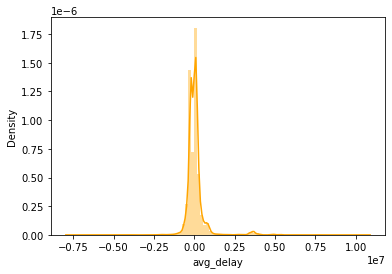

In [56]:
### Plotting the distribution of the 'avg_delay' column values
sns.distplot(y_train, bins=100, color='orange')


### You are expected to group the X_train dataset on 'name_customer' column with 'doc_id' in the x_train set

### Need to store the outcome into a new dataframe 

- Note code given for groupby statement- X_train.groupby(by=['name_customer'], as_index=False)['doc_id'].count()

In [57]:
### Groupping the X_train dataset on 'name_customer' column with 'doc_id' column in the x_train dataset
x_train_grouped = X_train.groupby('name_customer')['doc_id'].count()
x_train_grouped

name_customer
11078 us                1
17135 associates        1
99 CE                   1
99 CE co                1
99 CE corporation       1
                       ..
YEN BROS co             1
YEN BROS corp           1
YEN BROS corporation    2
YEN BROS llc            1
ZARCO co                1
Name: doc_id, Length: 3082, dtype: int64

### You can make another distribution plot of the "doc_id" column from x_train

<AxesSubplot:xlabel='doc_id', ylabel='Density'>

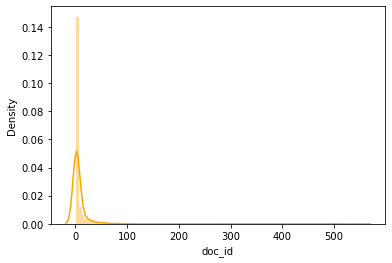

In [58]:
### Distribution of the 'doc_id' column values in the x_train dataset
sns.distplot(x_train_grouped, bins=100, color='orange')

#### Create a Distribution plot only for business_year and a seperate distribution plot of "business_year" column along with the doc_id" column


<AxesSubplot:xlabel='buisness_year', ylabel='Density'>

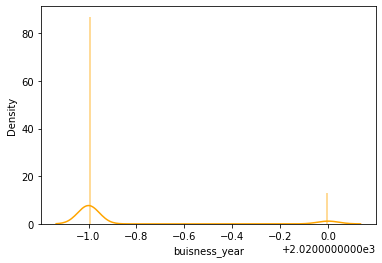

In [59]:
### Distribution plot for 'buisness_year' column values
sns.distplot(X_train['buisness_year'], bins=100, color='orange')

<AxesSubplot:ylabel='Density'>

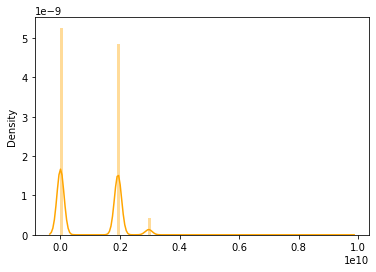

In [60]:
### Distribution plot for 'buisness_year' column along with 'doc_id' column values
sns.distplot(X_train[['buisness_year','doc_id']], bins=100, color='orange')

# Feature Engineering 

### Display and describe the X_train dataframe 

In [61]:
### Displaying the X_train df
X_train.head()

,converted_usd,buisness_year,posting_date,cust_payment_terms,doc_id,due_in_date,cust_number,name_customer,baseline_create_date,business_code
23790,36148.73,2019.0,2019-07-24,NAA8,1.929658e+09,2019-08-08,0200782001,GORDO in,2019-07-24,U001
36233,14224.47,2019.0,2019-01-19,NAA8,1.928650e+09,2019-02-03,0100031704,DELHAIZE co,2019-01-19,U001
25322,7617.25,2019.0,2019-12-01,NAH4,1.930206e+09,2019-12-16,0200769623,WAL-MAR corp,2019-12-01,U001
32653,21063.05,2020.0,2020-02-14,NAD1,1.930527e+09,2020-03-05,0200763814,SYSCO F us,2020-02-14,U001
10213,3116.08,2019.0,2019-05-30,CA10,2.960551e+09,2019-06-09,0140104440,SO us,2019-05-30,CA02


In [62]:
### Describing the X_train df
X_train.describe()

,converted_usd,buisness_year,doc_id
count,23494.000000,23494.000000,2.349400e+04
mean,30878.231013,2019.130544,2.014053e+09
std,36295.662887,0.336908,2.920677e+08
min,0.790000,2019.000000,1.928502e+09
25%,4518.210000,2019.000000,1.929180e+09
50%,16958.485000,2019.000000,1.929733e+09
75%,45944.400000,2019.000000,1.930209e+09
max,668593.360000,2020.000000,9.500000e+09


#### The "business_code" column inside X_train, is a categorical column, so you need to perform Labelencoder on that particular column

- Note - call the Label Encoder from sklearn library and use the fit() function on "business_code" column
- Note - Please fill in the blanks (two) to complete this code

In [63]:
from sklearn.preprocessing import LabelEncoder
business_coder = LabelEncoder()
business_coder.fit(X_train['business_code'])

LabelEncoder()

#### You are expected to store the value into a new column i.e. "business_code_enc"

- Note - For Training set you are expected to use fit_trainsform()
- Note - For Test set you are expected to use the trainsform()
- Note - For Validation set you are expected to use the trainsform()


- Partial code is provided, please fill in the blanks 

In [64]:
X_train['business_code_enc'] = business_coder.fit_transform(X_train['business_code'])

In [65]:
X_val['business_code_enc'] = business_coder.transform(X_val['business_code'])
X_test['business_code_enc'] = business_coder.transform(X_test['business_code'])

### Display "business_code" and "business_code_enc" together from X_train dataframe 

In [66]:
X_train[['business_code','business_code_enc']].head()

,business_code,business_code_enc
23790,U001,1
36233,U001,1
25322,U001,1
32653,U001,1
10213,CA02,0


#### Create a function called "custom" for dropping the columns 'business_code' from train, test and validation dataframe

- Note - Fill in the blank to complete the code

In [67]:
def custom(col ,traindf = X_train,valdf = X_val,testdf = X_test):
    traindf.drop(col, axis =1,inplace=True)
    valdf.drop(col,axis=1 , inplace=True)
    testdf.drop(col,axis=1 , inplace=True)

    return traindf,valdf ,testdf

### Call the function by passing the column name which needed to be dropped from train, test and validation dataframes. Return updated dataframes to be stored in X_train ,X_val, X_test  

- Note = Fill in the blank to complete the code 

In [68]:
X_train , X_val , X_test = custom(['business_code'])

### Manually replacing str values with numbers, Here we are trying manually replace the customer numbers with some specific values like, 'CCCA' as 1, 'CCU' as 2 and so on. Also we are converting the datatype "cust_number" field to int type.

- We are doing it for all the three dataframes as shown below. This is fully completed code. No need to modify anything here 



In [69]:
X_train['cust_number'] = X_train['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)
X_test['cust_number'] = X_test['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)
X_val['cust_number'] = X_val['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)


#### It differs from LabelEncoder by handling new classes and providing a value for it [Unknown]. Unknown will be added in fit and transform will take care of new item. It gives unknown class id.

#### This will fit the encoder for all the unique values and introduce unknown value

- Note - Keep this code as it is, we will be using this later on.  

In [70]:
#For encoding unseen labels
class EncoderExt(object):
    def __init__(self):
        self.label_encoder = LabelEncoder()
    def fit(self, data_list):
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_
        return self
    def transform(self, data_list):
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]
        return self.label_encoder.transform(new_data_list)

### Use the user define Label Encoder function called "EncoderExt" for the "name_customer" column

- Note - Keep the code as it is, no need to change

In [71]:
label_encoder = EncoderExt()
label_encoder.fit(X_train['name_customer'])
X_train['name_customer_enc']=label_encoder.transform(X_train['name_customer'])
X_val['name_customer_enc']=label_encoder.transform(X_val['name_customer'])
X_test['name_customer_enc']=label_encoder.transform(X_test['name_customer'])

### As we have created the a new column "name_customer_enc", so now drop "name_customer" column from all three dataframes

- Note - Keep the code as it is, no need to change

In [72]:
X_train ,X_val, X_test = custom(['name_customer'])

### Using Label Encoder for the "cust_payment_terms" column

- Note - Keep the code as it is, no need to change

In [73]:
label_encoder1 = EncoderExt()
label_encoder1.fit(X_train['cust_payment_terms'])
X_train['cust_payment_terms_enc']=label_encoder1.transform(X_train['cust_payment_terms'])
X_val['cust_payment_terms_enc']=label_encoder1.transform(X_val['cust_payment_terms'])
X_test['cust_payment_terms_enc']=label_encoder1.transform(X_test['cust_payment_terms'])

In [74]:
X_train ,X_val, X_test = custom(['cust_payment_terms'])

## Check the datatype of all the columns of Train, Test and Validation dataframes realted to X

- Note - You are expected yo use dtype

In [75]:
### Check the datatypes of the columns in the X_train dataset
X_train.dtypes

converted_usd                    float64
buisness_year                    float64
posting_date              datetime64[ns]
doc_id                           float64
due_in_date               datetime64[ns]
cust_number                        int32
baseline_create_date      datetime64[ns]
business_code_enc                  int32
name_customer_enc                  int32
cust_payment_terms_enc             int32
dtype: object

In [76]:
### Check the datatypes of the columns in the X_val dataset
X_val.dtypes

converted_usd                    float64
buisness_year                    float64
posting_date              datetime64[ns]
doc_id                           float64
due_in_date               datetime64[ns]
cust_number                        int32
baseline_create_date      datetime64[ns]
business_code_enc                  int32
name_customer_enc                  int32
cust_payment_terms_enc             int32
dtype: object

In [77]:
### Check the datatypes of the columns in the X_test dataset
X_test.dtypes

converted_usd                    float64
buisness_year                    float64
posting_date              datetime64[ns]
doc_id                           float64
due_in_date               datetime64[ns]
cust_number                        int32
baseline_create_date      datetime64[ns]
business_code_enc                  int32
name_customer_enc                  int32
cust_payment_terms_enc             int32
dtype: object

### From the above output you can notice their are multiple date columns with datetime format

### In order to pass it into our model, we need to convert it into float format

### You need to extract day, month and year from the "posting_date" column 

1.   Extract days from "posting_date" column and store it into a new column "day_of_postingdate" for train, test and validation dataset 
2.   Extract months from "posting_date" column and store it into a new column "month_of_postingdate" for train, test and validation dataset
3.   Extract year from "posting_date" column and store it into a new column "year_of_postingdate" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year






In [78]:
X_train['day_of_postingdate'] = X_train['posting_date'].dt.day
X_train['month_of_postingdate'] = X_train['posting_date'].dt.month
X_train['year_of_postingdate'] = X_train['posting_date'].dt.year

X_val['day_of_postingdate'] = X_val['posting_date'].dt.day
X_val['month_of_postingdate'] = X_val['posting_date'].dt.month
X_val['year_of_postingdate'] = X_val['posting_date'].dt.year


X_test['day_of_postingdate'] = X_test['posting_date'].dt.day
X_test['month_of_postingdate'] = X_test['posting_date'].dt.month
X_test['year_of_postingdate'] = X_test['posting_date'].dt.year



### pass the "posting_date" column into the Custom function for train, test and validation dataset

In [79]:
X_train ,X_val, X_test = custom(['posting_date'])

### You need to extract day, month and year from the "baseline_create_date" column 

1.   Extract days from "baseline_create_date" column and store it into a new column "day_of_createdate" for train, test and validation dataset 
2.   Extract months from "baseline_create_date" column and store it into a new column "month_of_createdate" for train, test and validation dataset
3.   Extract year from "baseline_create_date" column and store it into a new column "year_of_createdate" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year


- Note - Do as it is been shown in the previous two code boxes

### Extracting Day, Month, Year for 'baseline_create_date' column

In [80]:
### Extracting Day, Month and Year from the 'baseline_create_date' column
#### From training dataset
X_train['day_of_createdate'] = X_train['baseline_create_date'].dt.day
X_train['month_of_createdate'] = X_train['baseline_create_date'].dt.month
X_train['year_of_createdate'] = X_train['baseline_create_date'].dt.year

#### From validation dataset
X_val['day_of_createdate'] = X_val['baseline_create_date'].dt.day
X_val['month_of_createdate'] = X_val['baseline_create_date'].dt.month
X_val['year_of_createdate'] = X_val['baseline_create_date'].dt.year

#### From testing dataset
X_test['day_of_createdate'] = X_test['baseline_create_date'].dt.day
X_test['month_of_createdate'] = X_test['baseline_create_date'].dt.month
X_test['year_of_createdate'] = X_test['baseline_create_date'].dt.year

### pass the "baseline_create_date" column into the Custom function for train, test and validation dataset

In [81]:
### Pass the 'baseline_create_date' column to the custom function
X_train ,X_val, X_test = custom(['baseline_create_date'])

### You need to extract day, month and year from the "due_in_date" column 

1.   Extract days from "due_in_date" column and store it into a new column "day_of_due" for train, test and validation dataset 
2.   Extract months from "due_in_date" column and store it into a new column "month_of_due" for train, test and validation dataset
3.   Extract year from "due_in_date" column and store it into a new column "year_of_due" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year

- Note - Do as it is been shown in the previous code

In [82]:
### Extracting Day, Month and Year from the 'due_in_date' column
#### For training dataset
X_train['day_of_due'] = X_train['due_in_date'].dt.day
X_train['month_of_due'] = X_train['due_in_date'].dt.month
X_train['year_of_due'] = X_train['due_in_date'].dt.year

#### For validation dataset
X_val['day_of_due'] = X_val['due_in_date'].dt.day
X_val['month_of_due'] = X_val['due_in_date'].dt.month
X_val['year_of_due'] = X_val['due_in_date'].dt.year

#### For testing dataset
X_test['day_of_due'] = X_test['due_in_date'].dt.day
X_test['month_of_due'] = X_test['due_in_date'].dt.month
X_test['year_of_due'] = X_test['due_in_date'].dt.year

pass the "due_in_date" column into the Custom function for train, test and validation dataset

In [83]:
### Passing the 'due_in_date' column to the custom function
X_train ,X_val, X_test = custom(['due_in_date'])

### Check for the datatypes for train, test and validation set again

- Note - all the data type should be in either int64 or float64 format 


In [84]:
### Checking all the datatypes for train, val and test datasets
#### For training dataset
X_train.dtypes

converted_usd             float64
buisness_year             float64
doc_id                    float64
cust_number                 int32
business_code_enc           int32
name_customer_enc           int32
cust_payment_terms_enc      int32
day_of_postingdate          int64
month_of_postingdate        int64
year_of_postingdate         int64
day_of_createdate           int64
month_of_createdate         int64
year_of_createdate          int64
day_of_due                  int64
month_of_due                int64
year_of_due                 int64
dtype: object

In [85]:
#### For val dataset
X_val.dtypes

converted_usd             float64
buisness_year             float64
doc_id                    float64
cust_number                 int32
business_code_enc           int32
name_customer_enc           int32
cust_payment_terms_enc      int32
day_of_postingdate          int64
month_of_postingdate        int64
year_of_postingdate         int64
day_of_createdate           int64
month_of_createdate         int64
year_of_createdate          int64
day_of_due                  int64
month_of_due                int64
year_of_due                 int64
dtype: object

In [86]:
#### For testing dataset
X_test.dtypes

converted_usd             float64
buisness_year             float64
doc_id                    float64
cust_number                 int32
business_code_enc           int32
name_customer_enc           int32
cust_payment_terms_enc      int32
day_of_postingdate          int64
month_of_postingdate        int64
year_of_postingdate         int64
day_of_createdate           int64
month_of_createdate         int64
year_of_createdate          int64
day_of_due                  int64
month_of_due                int64
year_of_due                 int64
dtype: object

# Feature Selection

### Filter Method

- Calling the VarianceThreshold Function 
- Note - Keep the code as it is, no need to change 

In [87]:
from sklearn.feature_selection import VarianceThreshold
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(X_train)
len(X_train.columns[constant_filter.get_support()])

16

- Note - Keep the code as it is, no need to change 


In [88]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[constant_filter.get_support()]]
print(len(constant_columns))

0


- transpose the feature matrice
- print the number of duplicated features
- select the duplicated features columns names

- Note - Keep the code as it is, no need to change 


In [89]:
x_train_T = X_train.T
print(x_train_T.duplicated().sum())
duplicated_columns = x_train_T[x_train_T.duplicated()].index.values

0


### Filtering depending upon correlation matrix value
- We have created a function called handling correlation which is going to return fields based on the correlation matrix value with a threshold of 0.8

- Note - Keep the code as it is, no need to change 

In [90]:
def handling_correlation(X_train,threshold=0.8):
    corr_features = set()
    corr_matrix = X_train.corr()
    for i in range(len(corr_matrix .columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >threshold:
                colname = corr_matrix.columns[i]
                corr_features.add(colname)
    return list(corr_features)

- Note : Here we are trying to find out the relevant fields, from X_train
- Please fill in the blanks to call handling_correlation() function with a threshold value of 0.85

In [91]:
train=X_train.copy()
handling_correlation(train.copy(),0.85)

['year_of_postingdate',
 'month_of_due',
 'year_of_due',
 'day_of_createdate',
 'year_of_createdate',
 'month_of_createdate']

### Heatmap for X_train

- Note - Keep the code as it is, no need to change

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

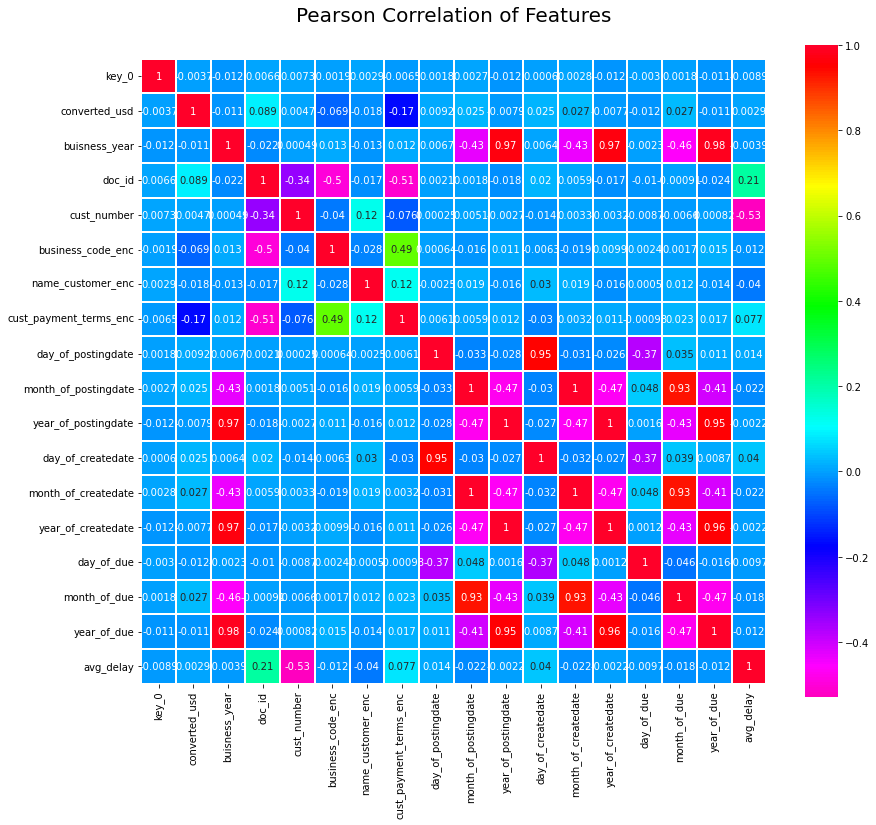

In [92]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=20)
sns.heatmap(X_train.merge(y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap='gist_rainbow_r', linecolor='white', annot=True)

#### Calling variance threshold for threshold value = 0.8

- Note -  Fill in the blanks to call the appropriate method

In [93]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(0.8)
sel.fit(X_train)

VarianceThreshold(threshold=0.8)

In [94]:
sel.variances_

array([1.31731907e+09, 1.13502241e-01, 8.52998973e+16, 1.76203485e+15,
       2.86005810e-01, 1.06154920e+06, 1.31996886e+02, 7.58705841e+01,
       1.21967773e+01, 1.13860905e-01, 7.73100989e+01, 1.22063475e+01,
       1.13924981e-01, 7.62267172e+01, 1.20653108e+01, 1.16386734e-01])

### Important features columns are 
- 'year_of_createdate' 
- 'year_of_due'
- 'day_of_createdate'
- 'year_of_postingdate'
- 'month_of_due'
- 'month_of_createdate'

# Modelling 

#### Now you need to compare with different machine learning models, and needs to find out the best predicted model

- Linear Regression
- Decision Tree Regression
- Random Forest Regression
- Support Vector Regression
- Extreme Gradient Boost Regression 

### You need to make different blank list for different evaluation matrix 

- MSE
- R2
- Algorithm

In [95]:
MSE_Score = []
R2_Score = []
Algorithm = []
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### You need to start with the baseline model Linear Regression

- Step 1 : Call the Linear Regression from sklearn library
- Step 2 : make an object of Linear Regression 
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [96]:
from sklearn.linear_model import LinearRegression
Algorithm.append('LinearRegression')
regressor = LinearRegression()
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [97]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [98]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

545333.2944215339

### Display The Comparison Lists

In [99]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression'],[295863108308.32855],[0.351161551502443],

### You need to start with the baseline model Support Vector Regression

- Step 1 : Call the Support Vector Regressor from sklearn library
- Step 2 : make an object of SVR
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [100]:
from sklearn.svm import SVR
Algorithm.append('SVR')
regressor = SVR()
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for "y_test" and "predicted" dataset and store those data inside respective list for comparison 

In [101]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [102]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

676900.5512340892

### Display The Comparison Lists

In [103]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'SVR'],[295863108308.32855, 459809621336.7091],[0.351161551502443, -0.008379054145025266],

### Your next model would be Decision Tree Regression

- Step 1 : Call the Decision Tree Regressor from sklearn library
- Step 2 : make an object of Decision Tree
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [104]:
### Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
Algorithm.append('DecisionTreeRegressor')
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [105]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [106]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

414694.1385953931

### Display The Comparison Lists

In [107]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'SVR', 'DecisionTreeRegressor'],[295863108308.32855, 459809621336.7091, 183639470895.48944],[0.351161551502443, -0.008379054145025266, 0.5972720287432081],

### Your next model would be Random Forest Regression

- Step 1 : Call the Random Forest Regressor from sklearn library
- Step 2 : make an object of Random Forest
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [108]:
### Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
Algorithm.append('RandomForestRegressor')
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [109]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [110]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

363108.31337451737

### Display The Comparison Lists


In [111]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'SVR', 'DecisionTreeRegressor', 'RandomForestRegressor'],[295863108308.32855, 459809621336.7091, 183639470895.48944, 136619756725.1507],[0.351161551502443, -0.008379054145025266, 0.5972720287432081, 0.7003879547723757],

### The last but not the least model would be XGBoost or Extreme Gradient Boost Regression

- Step 1 : Call the XGBoost Regressor from xgb library
- Step 2 : make an object of Xgboost
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose### Extreme Gradient Boost Regression
- Note -  No need to change the code 

In [112]:
import xgboost as xgb
Algorithm.append('XGB Regressor')
regressor = xgb.XGBRegressor()
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [113]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [114]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

344159.96804485074

### Display The Comparison Lists


In [115]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'SVR', 'DecisionTreeRegressor', 'RandomForestRegressor', 'XGB Regressor'],[295863108308.32855, 459809621336.7091, 183639470895.48944, 136619756725.1507, 113541711480.64839],[0.351161551502443, -0.008379054145025266, 0.5972720287432081, 0.7003879547723757, 0.7509989388738287],

## You need to make the comparison list into a comparison dataframe 

In [116]:
### Comparision list into dataframe
compareList = [Algorithm, MSE_Score, R2_Score]
compareDF = pd.DataFrame(compareList, index=['Algorithm', 'MSE', 'R2'], columns=['LinearRegression', 'SVR', 'DecisionTreeRegressor', 'RandomForestRegressor', 'XGB Regressor'])
compareDF


,LinearRegression,SVR,DecisionTreeRegressor,RandomForestRegressor,XGB Regressor
Algorithm,LinearRegression,SVR,DecisionTreeRegressor,RandomForestRegressor,XGB Regressor
MSE,295863108308.328552,459809621336.709106,183639470895.489441,136619756725.150696,113541711480.648392
R2,0.351162,-0.008379,0.597272,0.700388,0.750999


## Now from the Comparison table, you need to choose the best fit model

- Step 1 - Fit X_train and y_train inside the model 
- Step 2 - Predict the X_test dataset
- Step 3 - Predict the X_val dataset


- Note - No need to change the code

In [117]:
regressorfinal = xgb.XGBRegressor()
regressorfinal.fit(X_train, y_train)
predictedfinal = regressorfinal.predict(X_test)
predict_testfinal = regressorfinal.predict(X_val)

### Calculate the Mean Square Error for test dataset

- Note - No need to change the code

In [118]:
mean_squared_error(y_test,predictedfinal,squared=False)

336959.5101501787

### Calculate the mean Square Error for validation dataset

In [119]:
### mse for val set
mean_squared_error(y_val, predict_testfinal, squared=False)

344159.96804485074

### Calculate the R2 score for test

In [120]:
### R2 for test set
r2_score(y_test, predictedfinal)

0.7509989388738287

### Calculate the R2 score for Validation

In [121]:
### R2 for val set
r2_score(y_val, predict_testfinal)

0.7399042521370239

### Calculate the Accuracy for train Dataset 

In [122]:
### Accuracy for the train set for regression
regressorfinal.score(X_train, y_train)


0.9502629668368188

### Calculate the accuracy for validation

In [123]:
### Accuracy for the validation set
regressorfinal.score(X_val, y_val)

0.7399042521370239

### Calculate the accuracy for test

In [124]:
### Accuracy for the test set
regressorfinal.score(X_test, y_test)

0.7509989388738287

## Specify the reason behind choosing your machine learning model 

- Note : Provide your answer as a text here

## Now you need to pass the Nulldata dataframe into this machine learning model

#### In order to pass this Nulldata dataframe into the ML model, we need to perform the following

- Step 1 : Label Encoding 
- Step 2 : Day, Month and Year extraction 
- Step 3 : Change all the column data type into int64 or float64
- Step 4 : Need to drop the useless columns 

### Display the Nulldata 

In [125]:
nulldata = testDF.copy()
nulldata

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
3,CA02,0140105686,SYSC llc,NaT,2020.0,2.960623e+09,2020-03-30,2020-04-10,2020-03-31,CA10,2573.77
7,U001,0200744019,TARG us,NaT,2020.0,1.930659e+09,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.02
10,U001,0200418007,AM,NaT,2020.0,1.930611e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,3525.59
14,U001,0200739534,OK systems,NaT,2020.0,1.930788e+09,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.65
15,U001,0200353024,DECA corporation,NaT,2020.0,1.930817e+09,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.06
...,...,...,...,...,...,...,...,...,...,...,...
49975,U001,0200769623,WAL-MAR in,NaT,2020.0,1.930625e+09,2020-03-10,2020-03-25,2020-03-10,NAH4,13114.99
49980,U001,0200769623,WAL-MAR corporation,NaT,2020.0,1.930851e+09,2020-05-03,2020-05-18,2020-05-03,NAH4,8899.71
49982,U001,0200148860,DOLLA co,NaT,2020.0,1.930638e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,4967.06
49992,U001,0200900909,SYSCO co,NaT,2020.0,1.930702e+09,2020-03-25,2020-04-09,2020-03-25,NAA8,1998.64


### Check for the number of rows and columns in the nulldata

In [126]:
nulldata.shape

(9681, 11)

### Check the Description and Information of the nulldata 

In [127]:
### Description of the test data
nulldata.describe()

,buisness_year,doc_id,converted_usd
count,9681.0,9.681000e+03,9681.000000
mean,2020.0,2.006165e+09,32414.555760
std,0.0,2.673629e+08,35951.502492
min,2020.0,1.930535e+09,0.720000
25%,2020.0,1.930658e+09,5623.810000
50%,2020.0,1.930731e+09,19167.060000
75%,2020.0,1.930818e+09,48259.430000
max,2020.0,2.960636e+09,653644.800000


In [128]:
### Information of the test data
nulldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9681 entries, 3 to 49995
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         9681 non-null   object        
 1   cust_number           9681 non-null   object        
 2   name_customer         9681 non-null   object        
 3   clear_date            0 non-null      datetime64[ns]
 4   buisness_year         9681 non-null   float64       
 5   doc_id                9681 non-null   float64       
 6   posting_date          9681 non-null   datetime64[ns]
 7   due_in_date           9681 non-null   datetime64[ns]
 8   baseline_create_date  9681 non-null   datetime64[ns]
 9   cust_payment_terms    9681 non-null   object        
 10  converted_usd         9681 non-null   float64       
dtypes: datetime64[ns](4), float64(3), object(4)
memory usage: 907.6+ KB


### Storing the Nulldata into a different dataset 
# for BACKUP

In [129]:
nulldataBackup = nulldata.copy()
nulldataBackup

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
3,CA02,0140105686,SYSC llc,NaT,2020.0,2.960623e+09,2020-03-30,2020-04-10,2020-03-31,CA10,2573.77
7,U001,0200744019,TARG us,NaT,2020.0,1.930659e+09,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.02
10,U001,0200418007,AM,NaT,2020.0,1.930611e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,3525.59
14,U001,0200739534,OK systems,NaT,2020.0,1.930788e+09,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.65
15,U001,0200353024,DECA corporation,NaT,2020.0,1.930817e+09,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.06
...,...,...,...,...,...,...,...,...,...,...,...
49975,U001,0200769623,WAL-MAR in,NaT,2020.0,1.930625e+09,2020-03-10,2020-03-25,2020-03-10,NAH4,13114.99
49980,U001,0200769623,WAL-MAR corporation,NaT,2020.0,1.930851e+09,2020-05-03,2020-05-18,2020-05-03,NAH4,8899.71
49982,U001,0200148860,DOLLA co,NaT,2020.0,1.930638e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,4967.06
49992,U001,0200900909,SYSCO co,NaT,2020.0,1.930702e+09,2020-03-25,2020-04-09,2020-03-25,NAA8,1998.64


### Call the Label Encoder for Nulldata

- Note - you are expected to fit "business_code" as it is a categorical variable
- Note - No need to change the code

In [130]:
from sklearn.preprocessing import LabelEncoder
business_codern = LabelEncoder()
business_codern.fit(nulldata['business_code'])
nulldata['business_code_enc'] = business_codern.transform(nulldata['business_code'])

### Now you need to manually replacing str values with numbers
- Note - No need to change the code

In [131]:
nulldata['cust_number'] = nulldata['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)

## You need to extract day, month and year from the "clear_date", "posting_date", "due_in_date", "baseline_create_date" columns


##### 1.   Extract day from "clear_date" column and store it into 'day_of_cleardate'
##### 2.   Extract month from "clear_date" column and store it into 'month_of_cleardate'
##### 3.   Extract year from "clear_date" column and store it into 'year_of_cleardate'



##### 4.   Extract day from "posting_date" column and store it into 'day_of_postingdate'
##### 5.   Extract month from "posting_date" column and store it into 'month_of_postingdate'
##### 6.   Extract year from "posting_date" column and store it into 'year_of_postingdate'




##### 7.   Extract day from "due_in_date" column and store it into 'day_of_due'
##### 8.   Extract month from "due_in_date" column and store it into 'month_of_due'
##### 9.   Extract year from "due_in_date" column and store it into 'year_of_due'




##### 10.   Extract day from "baseline_create_date" column and store it into 'day_of_createdate'
##### 11.   Extract month from "baseline_create_date" column and store it into 'month_of_createdate'
##### 12.   Extract year from "baseline_create_date" column and store it into 'year_of_createdate'




- Note - You are supposed To use - 

*   dt.day
*   dt.month
*   dt.year

In [132]:
### For 'clear_date'
nulldata['day_of_cleardate'] = nulldata['clear_date'].dt.day
nulldata['month_of_cleardate'] = nulldata['clear_date'].dt.month
nulldata['year_of_cleardate'] = nulldata['clear_date'].dt.year

### For 'posting_date'
nulldata['day_of_postingdate'] = nulldata['posting_date'].dt.day
nulldata['month_of_postingdate'] = nulldata['posting_date'].dt.month
nulldata['year_of_postingdate'] = nulldata['posting_date'].dt.year

### For 'due_in_date'
nulldata['day_of_due'] = nulldata['due_in_date'].dt.day
nulldata['month_of_due'] = nulldata['due_in_date'].dt.month
nulldata['year_of_due'] = nulldata['due_in_date'].dt.year

### For 'baseline_create_date'
nulldata['day_of_createdate'] = nulldata['baseline_create_date'].dt.day
nulldata['month_of_createdate'] = nulldata['baseline_create_date'].dt.month
nulldata['year_of_createdate'] = nulldata['baseline_create_date'].dt.year

### Use Label Encoder1 of all the following columns - 
- 'cust_payment_terms' and store into 'cust_payment_terms_enc'
- 'business_code' and store into 'business_code_enc'
- 'name_customer' and store into 'name_customer_enc'

Note - No need to change the code

In [133]:
nulldata['cust_payment_terms_enc']=label_encoder1.transform(nulldata['cust_payment_terms'])
nulldata['business_code_enc']=label_encoder1.transform(nulldata['business_code'])
nulldata['name_customer_enc']=label_encoder.transform(nulldata['name_customer'])


### Check for the datatypes of all the columns of Nulldata

In [134]:
nulldata.dtypes

business_code                     object
cust_number                        int32
name_customer                     object
clear_date                datetime64[ns]
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
cust_payment_terms                object
converted_usd                    float64
business_code_enc                  int32
day_of_cleardate                 float64
month_of_cleardate               float64
year_of_cleardate                float64
day_of_postingdate                 int64
month_of_postingdate               int64
year_of_postingdate                int64
day_of_due                         int64
month_of_due                       int64
year_of_due                        int64
day_of_createdate                  int64
month_of_createdate                int64
year_of_createdate                 int64
cust_payment_ter

### Now you need to drop all the unnecessary columns - 

- 'business_code'
- "baseline_create_date"
- "due_in_date"
- "posting_date"
- "name_customer"
- "clear_date"
- "cust_payment_terms"
- 'day_of_cleardate'
- "month_of_cleardate"
- "year_of_cleardate"

In [135]:
### Dropping the unwanted columns
nulldata.drop(['business_code','baseline_create_date', 'due_in_date','posting_date','name_customer','clear_date','cust_payment_terms','day_of_cleardate','month_of_cleardate','year_of_cleardate'],axis=1,inplace=True)

### Check the information of the "nulldata" dataframe

In [136]:
### Information of the test data
nulldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9681 entries, 3 to 49995
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cust_number             9681 non-null   int32  
 1   buisness_year           9681 non-null   float64
 2   doc_id                  9681 non-null   float64
 3   converted_usd           9681 non-null   float64
 4   business_code_enc       9681 non-null   int32  
 5   day_of_postingdate      9681 non-null   int64  
 6   month_of_postingdate    9681 non-null   int64  
 7   year_of_postingdate     9681 non-null   int64  
 8   day_of_due              9681 non-null   int64  
 9   month_of_due            9681 non-null   int64  
 10  year_of_due             9681 non-null   int64  
 11  day_of_createdate       9681 non-null   int64  
 12  month_of_createdate     9681 non-null   int64  
 13  year_of_createdate      9681 non-null   int64  
 14  cust_payment_terms_enc  9681 non-null  

### Compare "nulldata" with the "X_test" dataframe 

- use info() method

In [137]:
### Compare nulldata with X_test
nulldata.info

<bound method DataFrame.info of        cust_number  buisness_year        doc_id  converted_usd  \
3        140105686         2020.0  2.960623e+09        2573.77   
7        200744019         2020.0  1.930659e+09       11173.02   
10       200418007         2020.0  1.930611e+09        3525.59   
14       200739534         2020.0  1.930788e+09      121105.65   
15       200353024         2020.0  1.930817e+09        3726.06   
...            ...            ...           ...            ...   
49975    200769623         2020.0  1.930625e+09       13114.99   
49980    200769623         2020.0  1.930851e+09        8899.71   
49982    200148860         2020.0  1.930638e+09        4967.06   
49992    200900909         2020.0  1.930702e+09        1998.64   
49995    200561861         2020.0  1.930797e+09        3187.86   

       business_code_enc  day_of_postingdate  month_of_postingdate  \
3                     65                  30                     3   
7                     65           

In [138]:
X_test.info

<bound method DataFrame.info of        converted_usd  buisness_year        doc_id  cust_number  \
48629       74621.52         2019.0  1.929012e+09    200466603   
45220       13453.19         2019.0  1.928715e+09          102   
32249       15088.00         2019.0  1.930116e+09    100016691   
2601       147593.64         2019.0  1.929896e+09    200772670   
1171         7549.32         2019.0  1.928648e+09    200696090   
...              ...            ...           ...          ...   
37548        1451.69         2019.0  1.929801e+09    200769623   
4496        59660.34         2019.0  1.930135e+09    200739534   
40068       16410.63         2019.0  1.929229e+09    100043892   
38230        5035.69         2019.0  1.928850e+09    200769623   
44525       17480.46         2019.0  1.929433e+09    200726979   

       business_code_enc  name_customer_enc  cust_payment_terms_enc  \
48629                  1               2525                      20   
45220                  1         

### You must have noticed that there is a mismatch in the column sequence while compairing the dataframes

- Note - In order to fed into the machine learning model, you need to edit the sequence of "nulldata", similar to the "X_test" dataframe

- Display all the columns of the X_test dataframe 
- Display all the columns of the Nulldata dataframe 
- Store the Nulldata with new sequence into a new dataframe 


- Note - The code is given below, no need to change 

In [139]:
X_test.columns

Index(['converted_usd', 'buisness_year', 'doc_id', 'cust_number',
       'business_code_enc', 'name_customer_enc', 'cust_payment_terms_enc',
       'day_of_postingdate', 'month_of_postingdate', 'year_of_postingdate',
       'day_of_createdate', 'month_of_createdate', 'year_of_createdate',
       'day_of_due', 'month_of_due', 'year_of_due'],
      dtype='object')

In [140]:
nulldata.columns

Index(['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'day_of_postingdate', 'month_of_postingdate',
       'year_of_postingdate', 'day_of_due', 'month_of_due', 'year_of_due',
       'day_of_createdate', 'month_of_createdate', 'year_of_createdate',
       'cust_payment_terms_enc', 'name_customer_enc'],
      dtype='object')

In [141]:
nulldata2=nulldata[['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'name_customer_enc', 'cust_payment_terms_enc',
       'day_of_postingdate', 'month_of_postingdate', 'year_of_postingdate',
       'day_of_createdate', 'month_of_createdate', 'year_of_createdate',
       'day_of_due', 'month_of_due', 'year_of_due']]

### Display the Final Dataset

In [142]:
### Displaying the final dataset
nulldata2.head()

,cust_number,buisness_year,doc_id,converted_usd,business_code_enc,name_customer_enc,cust_payment_terms_enc,day_of_postingdate,month_of_postingdate,year_of_postingdate,day_of_createdate,month_of_createdate,year_of_createdate,day_of_due,month_of_due,year_of_due
3,140105686,2020.0,2.960623e+09,2573.77,65,2700,5,30,3,2020,31,3,2020,10,4,2020
7,200744019,2020.0,1.930659e+09,11173.02,65,2780,20,19,3,2020,19,3,2020,3,4,2020
10,200418007,2020.0,1.930611e+09,3525.59,65,94,20,11,3,2020,11,3,2020,26,3,2020
14,200739534,2020.0,1.930788e+09,121105.65,65,2015,20,15,4,2020,15,4,2020,30,4,2020
15,200353024,2020.0,1.930817e+09,3726.06,65,723,36,23,4,2020,16,4,2020,26,4,2020


### Now you can pass this dataset into you final model and store it into "final_result"

In [143]:
### Passing the dataset into final model and storing it into 'final_result'
final_result = regressorfinal.predict(nulldata2)

### you need to make the final_result as dataframe, with a column name "avg_delay"

- Note - No need to change the code

In [144]:
final_result = pd.Series(final_result,name='avg_delay')

### Display the "avg_delay" column

In [145]:
### Displaying the 'avg_delay' column
final_result.head()

0    243045.437500
1   -295458.093750
2    -32038.181641
3   -640738.500000
4    436686.531250
Name: avg_delay, dtype: float32

### Now you need to merge this final_result dataframe with the BACKUP of "nulldata" Dataframe which we have created in earlier steps

In [146]:
nulldataBackup.reset_index(drop=True,inplace=True)
Final = nulldataBackup.merge(final_result , on = nulldata.index )

### Display the "Final" dataframe 

In [147]:
Final.head()

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,avg_delay
0,3,CA02,0140105686,SYSC llc,NaT,2020.0,2.960623e+09,2020-03-30,2020-04-10,2020-03-31,CA10,2573.77,243045.437500
1,7,U001,0200744019,TARG us,NaT,2020.0,1.930659e+09,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.02,-295458.093750
2,10,U001,0200418007,AM,NaT,2020.0,1.930611e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,3525.59,-32038.181641
3,14,U001,0200739534,OK systems,NaT,2020.0,1.930788e+09,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.65,-640738.500000
4,15,U001,0200353024,DECA corporation,NaT,2020.0,1.930817e+09,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.06,436686.531250


### Check for the Number of Rows and Columns in your "Final" dataframe 

In [148]:
Final.shape

(9681, 13)

### Now, you need to do convert the below fields back into date and time format 

- Convert "due_in_date" into datetime format
- Convert "avg_delay" into datetime format
- Create a new column "clear_date" and store the sum of "due_in_date" and "avg_delay"
- display the new "clear_date" column
- Note - Code is given below, no need to change 

In [149]:
Final['clear_date'] = pd.to_datetime(Final['due_in_date']) + pd.to_timedelta(Final['avg_delay'], unit='s')

### Display the "clear_date" column

In [150]:
Final[['clear_date']].head()

,clear_date
0,2020-04-12 19:30:45.437500000
1,2020-03-30 13:55:41.906250000
2,2020-03-25 15:06:01.818359375
3,2020-04-22 14:01:01.500000000
4,2020-05-01 01:18:06.531250000


### Convert the average delay into number of days format 

- Note - Formula = avg_delay//(24 * 3600)
- Note - full code is given for this, no need to change 

In [151]:
Final['avg_delay'] = Final.apply(lambda row: row.avg_delay//(24 * 3600), axis = 1)

### Display the "avg_delay" column 

In [152]:
Final[['avg_delay']].head()

,avg_delay
0,2.0
1,-4.0
2,-1.0
3,-8.0
4,5.0


### Now you need to convert average delay column into bucket

- Need to perform binning 
- create a list of bins i.e. bins= [0,15,30,45,60,100]
- create a list of labels i.e. labels = ['0-15','16-30','31-45','46-60','Greatar than 60']
- perform binning by using cut() function from "Final" dataframe


- Please fill up the first two rows of the code

In [153]:

bins= [0,15,30,45,60,100]
labels =['0-15','15-30','30-45','45-60','Greater than 60']
Final['Aging Bucket'] = pd.cut(Final['avg_delay'], bins=bins, labels=labels, right=False)

### Now you need to drop "key_0" and "avg_delay" columns from the "Final" Dataframe

In [154]:
### Dropping the 'key_0' and 'avg_delay' columns
Final.drop(['key_0','avg_delay'],axis=1,inplace=True)

### Display the count of each categoty of new "Aging Bucket" column 

In [155]:
### Displaying the count of each category of 'Aging Bucket'
Final['Aging Bucket'].value_counts()

0-15               1569
15-30               799
30-45               127
45-60                23
Greater than 60       0
Name: Aging Bucket, dtype: int64

### Display your final dataset with aging buckets 

In [156]:
Final.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,Aging Bucket
0,CA02,0140105686,SYSC llc,2020-04-12 19:30:45.437500000,2020.0,2.960623e+09,2020-03-30,2020-04-10,2020-03-31,CA10,2573.77,0-15
1,U001,0200744019,TARG us,2020-03-30 13:55:41.906250000,2020.0,1.930659e+09,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.02,NaN
2,U001,0200418007,AM,2020-03-25 15:06:01.818359375,2020.0,1.930611e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,3525.59,NaN
3,U001,0200739534,OK systems,2020-04-22 14:01:01.500000000,2020.0,1.930788e+09,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.65,NaN
4,U001,0200353024,DECA corporation,2020-05-01 01:18:06.531250000,2020.0,1.930817e+09,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.06,0-15


### Store this dataframe into the .csv format

In [157]:
### Storing it into a csv file
Final.to_csv('Final_result.csv',index=False)

# END OF THE PROJECT